# Data Preprocessing

In [244]:
# import libraries
import pandas as pd
import numpy as np

In [245]:
# Load data
heart = pd.read_csv('../data/heart.csv', sep=';')
heart.drop(columns='id', inplace=True)

heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [246]:
print(heart.shape)
heart.info()

(70000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


### Data Preprocessing Steps
1. Check for nulls
2. Check for duplicates
3. Examine value counts
3. Examine unique values
4. Check for outliers

In [247]:
# Check for nulls
null = heart.isnull().sum()
check_nulls = pd.DataFrame({"Feature": null.index, "Null Count": null.values,
             "%": null.values / len(heart)}).sort_values(by='Null Count', ascending=False).reset_index(drop=True)

check_nulls

,Feature,Null Count,%
0,age,0,0.0
1,gender,0,0.0
2,height,0,0.0
3,weight,0,0.0
4,ap_hi,0,0.0
5,ap_lo,0,0.0
6,cholesterol,0,0.0
7,gluc,0,0.0
8,smoke,0,0.0
9,alco,0,0.0


In [248]:
# Check for duplicates
print('Duplicates Count:', heart.duplicated().sum())

print('Dropping Duplicates...')
heart.drop_duplicates(inplace=True)

print('Duplicates Count:', heart.duplicated().sum())

Duplicates Count: 24
Dropping Duplicates...
Duplicates Count: 0


In [249]:
# Changing age column from days old to years old
heart['age'] = (heart.age/365).astype('int64')
heart.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [256]:
# Change weight float to int
heart['weight'] = heart.weight.astype('int64')
heart.dtypes

age            int64
gender         int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
dtype: object

In [257]:
# Check value counts
def count_values(df):
    columns = df.columns
    for col in columns:
        print('Feature:', col.upper())
        print('--------------------------------------------------')
        print('Value Counts:', heart[col].value_counts().sort_index().to_dict(), '\n')        
    
count_values(heart)


Feature: AGE
--------------------------------------------------
Value Counts: {29: 3, 30: 1, 39: 1779, 40: 1622, 41: 1903, 42: 1418, 43: 2031, 44: 1513, 45: 2087, 46: 1622, 47: 2196, 48: 1810, 49: 3416, 50: 3215, 51: 3366, 52: 3277, 53: 3868, 54: 3604, 55: 3926, 56: 3605, 57: 3685, 58: 3407, 59: 3575, 60: 3197, 61: 2728, 62: 2199, 63: 2736, 64: 2187} 

Feature: GENDER
--------------------------------------------------
Value Counts: {1: 45509, 2: 24467} 

Feature: HEIGHT
--------------------------------------------------
Value Counts: {55: 1, 57: 1, 59: 1, 60: 1, 64: 1, 65: 2, 66: 1, 67: 3, 68: 2, 70: 3, 71: 1, 72: 1, 74: 1, 75: 2, 76: 1, 80: 1, 81: 1, 91: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 3, 104: 2, 105: 2, 108: 1, 109: 2, 110: 7, 111: 1, 112: 1, 113: 1, 117: 2, 119: 1, 120: 34, 122: 1, 125: 4, 128: 1, 130: 12, 131: 1, 132: 3, 133: 6, 134: 2, 135: 5, 136: 5, 137: 11, 138: 9, 139: 6, 140: 48, 141: 21, 142: 29, 143: 46, 144: 71, 145: 153, 146: 151, 147: 225, 148: 300, 149: 341, 150: 10

In [252]:
# Check unique values
def unique_values(df):
    columns = df.columns
    for col in columns:
        print('Feature:', col.upper())
        print('--------------------------------------------------')
        print('# of Unique Values:', (len(df[col].unique())))
        print('Unique Values:', sorted(df[col].unique()), '\n')
        
    
unique_values(heart)

Feature: AGE
--------------------------------------------------
# of Unique Values: 28
Unique Values: [29, 30, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64] 

Feature: GENDER
--------------------------------------------------
# of Unique Values: 2
Unique Values: [1, 2] 

Feature: HEIGHT
--------------------------------------------------
# of Unique Values: 109
Unique Values: [55, 57, 59, 60, 64, 65, 66, 67, 68, 70, 71, 72, 74, 75, 76, 80, 81, 91, 96, 97, 98, 99, 100, 104, 105, 108, 109, 110, 111, 112, 113, 117, 119, 120, 122, 125, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 207, 250] 

Feature: WEIGHT
----------------------

In [253]:
# Check for outliers
heart.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,52.840874,1.349648,164.359152,74.207157,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,6.767103,0.476862,8.211218,14.397407,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


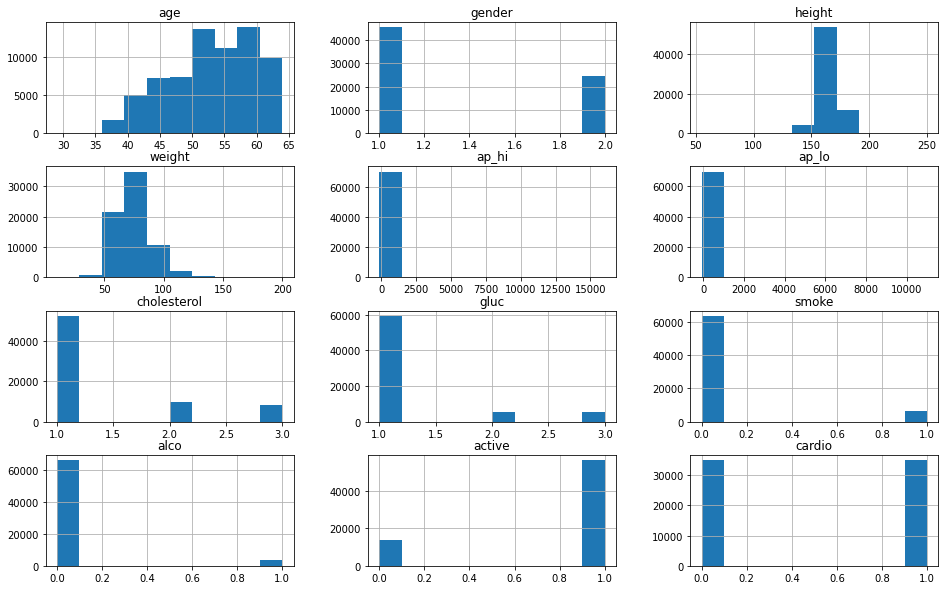

In [254]:
heart.hist(figsize=(16,10));

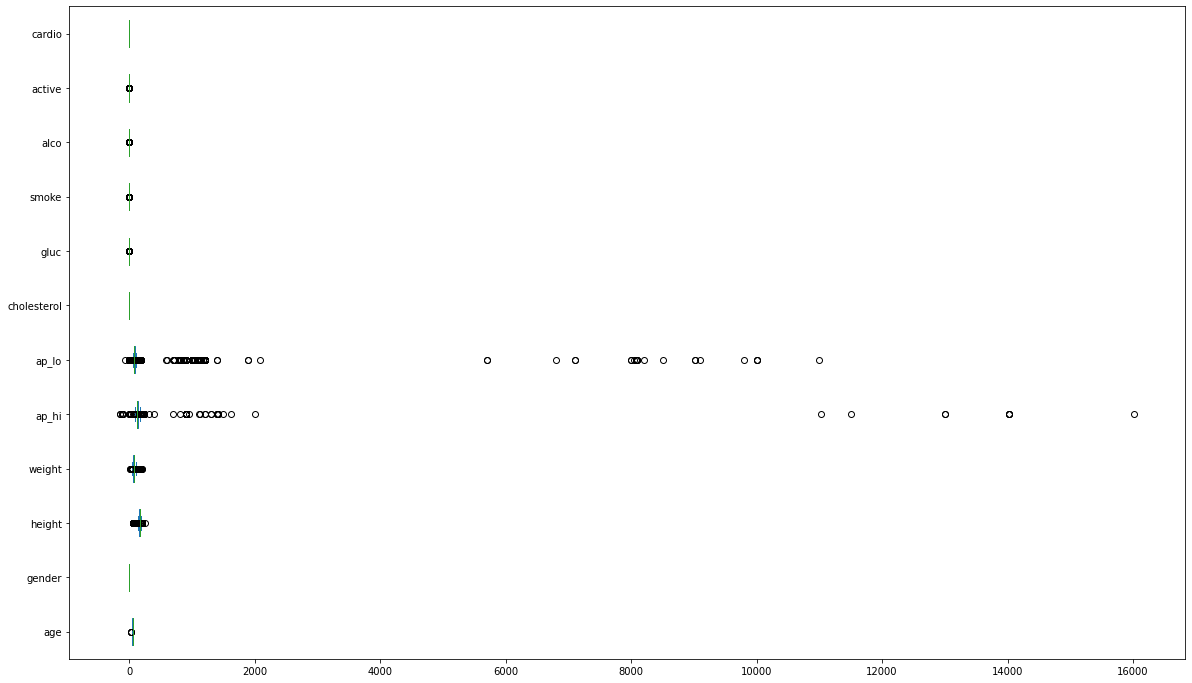

In [255]:
heart.plot.box(figsize=(20,12), vert=False);

In [263]:
heart[heart.height == 55]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
22723,64,1,55,81,130,90,1,1,0,0,1,1


In [264]:
heart[heart.weight == 10]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
57858,51,2,165,10,180,1100,2,2,0,0,1,1
